In [24]:
from scipy.integrate import quad
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd


In [25]:
file_name = 'raw2/9,7 ppm CH4/001'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(2,101):
    if i >=100:
        ind = i
    elif i >=10:
        ind = f"0{i}"
    else:
        ind = f"00{i}"
#     ind = f"0{i}" if i>=10 else f"00{i}"
#     print(ind)
    file_name = f"raw2/9,7 ppm CH4/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x            y0      y1      y2          y3
0            0  6.169220e+08 -119552 -160000 -15325400.0
1            1  5.276450e+08  -41728 -173312 -15290100.0
2            2 -1.172180e+09   -6912 -168448 -13454100.0
3            3 -1.507900e+09   27136 -151552  -2473730.0
4            4 -1.396450e+09   41728 -162816   1583620.0
...        ...           ...     ...     ...         ...
9599995  95995  4.778290e+08 -728064 -149760   1824770.0
9599996  95996  4.685250e+08 -727040 -166912  -6685700.0
9599997  95997  5.229380e+08 -692736 -171264  -9049340.0
9599998  95998  4.970170e+08 -637184 -161280 -10361100.0
9599999  95999  5.695900e+08 -570112 -158976 -13032700.0

[9600000 rows x 5 columns]


$$Wavelet\ Pyro$$

In [26]:
Size_pyro = 9_600_000

sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

dt = 1.0/48_000
wavelet = 'mexh'
max_scale = 6.9
scales = np.arange(6.5, max_scale, 0.005)

slase = 95750
size_shape = 500

delta_time = 48000
interval = int(Size_pyro/delta_time)




In [27]:

[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)


period = 1.0/frequencies

cfs_pyro_shape = np.array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])

# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))



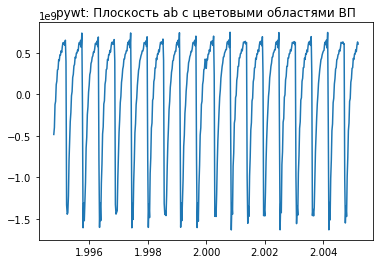

In [28]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

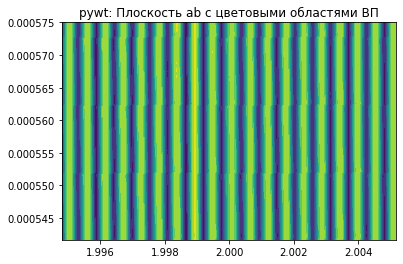

In [29]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape,10)
plt.show()

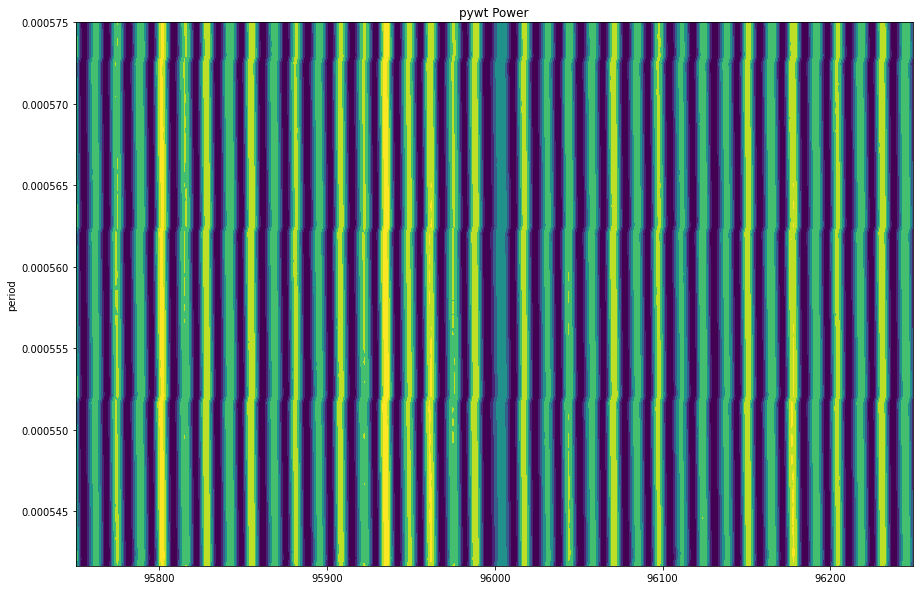

In [30]:
# power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (abs(cfs_pyro_shape))**2

# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

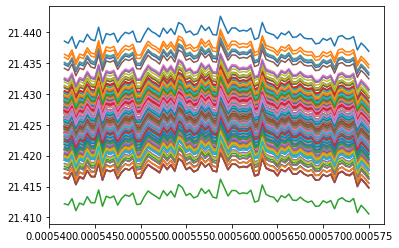

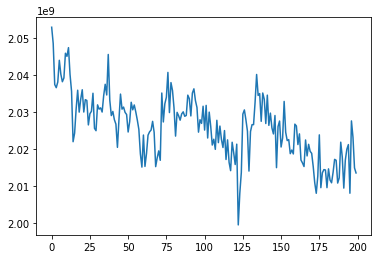

In [31]:
# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = abs(cfs_pyro).transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = np.zeros((interval,int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[j][i-1] = temp_pyro[i-1].mean()
    plt.plot(period, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()

$$Save\ \  Pyro\ \  in\ \  .csv$$

In [32]:
from pathlib import Path  

df_mean_pyro_scales = pd.DataFrame(mean_pyro_scales)
df_mean_pyro_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/pyro_9_7.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

# df_mean_pyro_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)


$$KERNEL\ \  FALLED$$

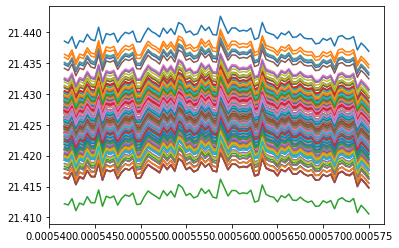

1789.709172259509


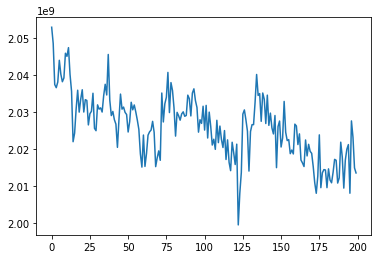

In [93]:
file_name_pyro = 'wt_raw/pyro_9_7.csv'
df_pyro_Amp = pd.read_csv(file_name_pyro) 
df_pyro_Amp = df_pyro_Amp.drop('Unnamed: 0', axis = 1)


mean_pyro_scales = df_pyro_Amp.to_numpy()

period = [float(str_j) for str_j in list(df_pyro_Amp.columns)]

plt.figure('max_Amp')
    
Max_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(period, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     print(1.0/period[mean_pyro_scales[j].argmax()])
plt.show()

print(1.0/period[mean_pyro_scales[1].argmax()])


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()    



$$Wavelet \ OAD$$

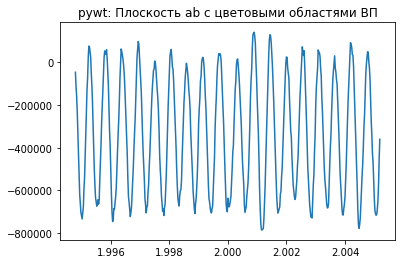

In [36]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
cfs_oad_shape = np.array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

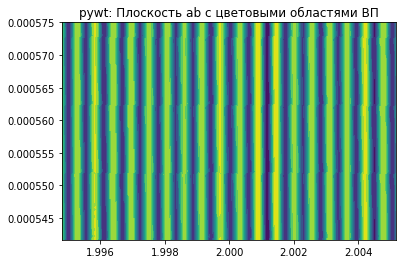

In [37]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

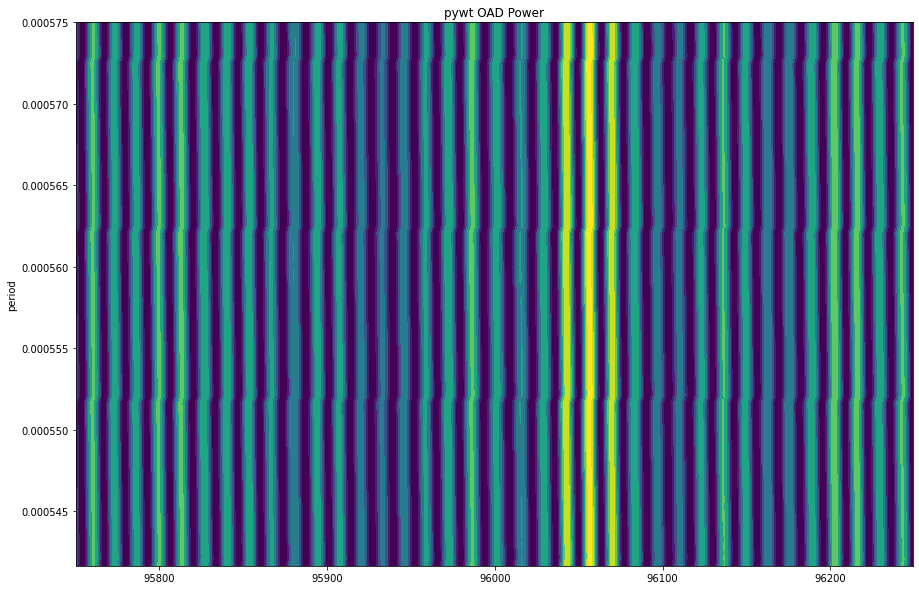

In [38]:
# power_oad = (abs(cfs_oad)) ** 2
power_oad_shape = (abs(cfs_oad_shape))**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

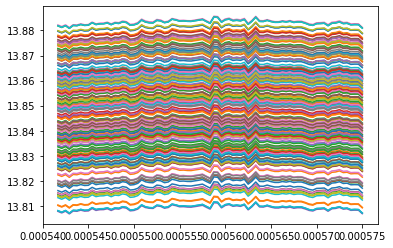

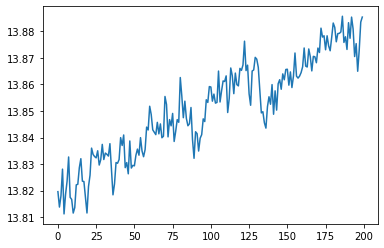

In [39]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = abs(cfs_oad).transpose()
# Amp_oad = zeros((interval))


mean_oad_scales = np.zeros((interval,int(len(scales))))

Max_oad_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[j][i-1] = temp_oad[i-1].mean()
    plt.plot(period, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_oad_amp_scales))
plt.show()

$$Save \ OAD \ to \ .csv$$

In [40]:
from pathlib import Path  

df_mean_oad_scales = pd.DataFrame(mean_oad_scales)
df_mean_oad_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/oad_9_7.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

# df_mean_oad_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

$$ KERNEL \ FALLED$$

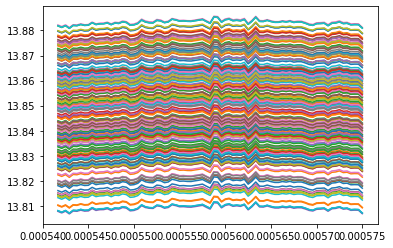

128
1789.709172259509
72
1775.1479289940846


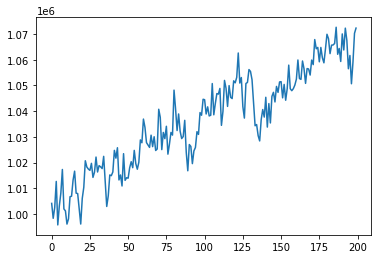

In [80]:
file_name_oad = 'wt_raw/oad_9_7.csv'
df_oad_Amp = pd.read_csv(file_name_oad) 
df_oad_Amp = df_oad_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_scales = df_oad_Amp.to_numpy()

period = [float(str_j) for str_j in list(df_oad_Amp.columns)]

plt.figure('max_Amp')
    
Max_oad_amp_scales = np.zeros((interval))

counter = 0
for j in range(0,interval,1):
    plt.plot(period, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     Max_oad_amp_scales[j] = mean_oad_scales[j][41]
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
    if mean_oad_scales[j].argmax() == 52:
        counter =counter + 1

plt.show()

print(200 - counter)
print(1.0/period[41])

print(counter)
print(1.0/period[52])



plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
plt.show()    






$$Wavelet \ \ \ OAD\ / \ Pyro$$

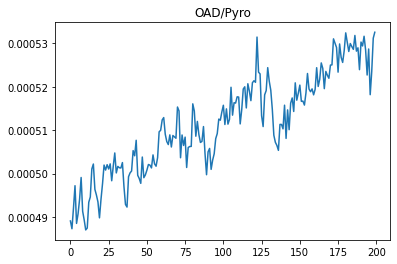

In [81]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_wavelet)
plt.show()

$$Fourier \ Transform$$

In [6]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

max_intensity_OAD = np.zeros(600)
max_index_OAD = np.zeros(600)
max_intensity_Pyro = np.zeros(600)
max_index_Pyro = np.zeros(600)

min_freq = 1770
max_freq = 1810



for i in range(0,300):
    if i >=100:
        ind = i
    elif i >=10:
        ind = f"0{i}"
    else:
        ind = f"00{i}"
    file_name = f"raw2/9,7 ppm CH4/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE]
    OAD = df.y1.values[0:SAMPLE_RATE]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*(i-1)] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*(i-1)] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*(i-1)] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*(i-1)] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*(i-1)+1] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*(i-1)+1] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*(i-1)+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*(i-1)+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
    print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
    print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])

1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0
1800.0

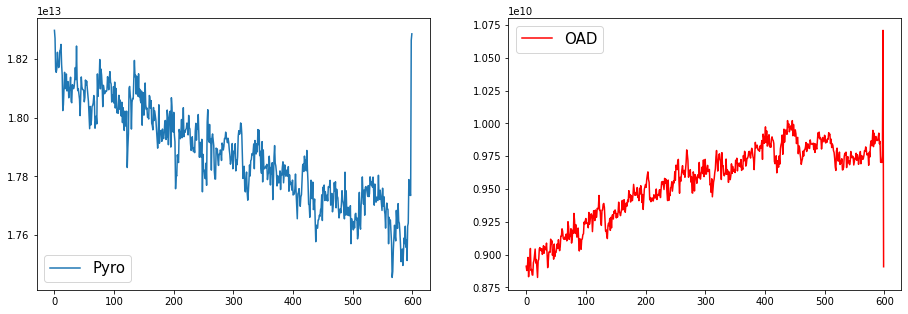

In [7]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(600)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(600)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})

0.03888015338105025


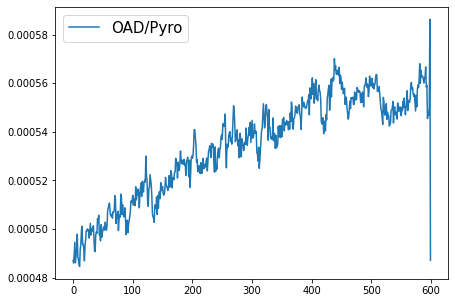

In [8]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(600)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

print(S_fourier.std()/S_fourier.mean())


# from scipy.optimize import curve_fit

# def func_theory(x, A, B):
#     return A + B*x


# x = np.arange(200)

# popt, pcov = curve_fit(func_theory, x, S_fourier)

# A_opt,B_opt = popt

# print(B_opt/S_fourier.mean()*100)

# d_S_f = S_fourier - func_theory(x,A_opt,B_opt)
# print(d_S_f.std()/S_fourier.mean()*100)




NameError: name 'S_wavelet' is not defined

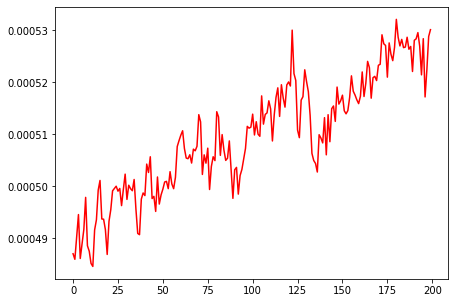

In [23]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.legend(prop={'size': 15})

In [10]:
print(S_fourier.std()-S_wavelet.std())

NameError: name 'S_wavelet' is not defined

In [88]:
print(S_fourier.std()/S_fourier.mean(), S_wavelet.std()/S_wavelet.mean())

0.02233225445911536 0.022151061447606715


In [89]:
print((S_fourier - S_wavelet).mean())

-1.8339925395075937e-06


In [90]:
print((S_fourier - S_wavelet).mean()/S_fourier.mean()*100)

-0.35986960422520586


           x           y0      y1      y2          y3
0          0 -980814000.0  -70912 -160256   9114370.0
1          1 -709856000.0 -113152 -168960   6683140.0
2          2 -439998000.0 -153344 -146432  12807700.0
3          3 -303164000.0 -220416 -170752  16785400.0
4          4  -88101100.0 -293376 -166144  14990100.0
...      ...          ...     ...     ...         ...
95995  95995  477375000.0 -734976 -161792  -6444800.0
95996  95996  531705000.0 -701440 -180992  -8610300.0
95997  95997  508912000.0 -633088 -171520  -9846780.0
95998  95998  581161000.0 -567808 -149504 -12260900.0
95999  95999  628118000.0 -467968 -170496 -11489000.0

[96000 rows x 5 columns]


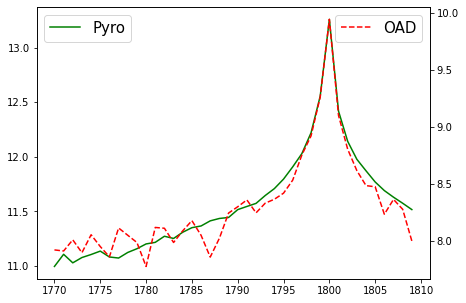

In [35]:
file_name = 'raw2/9,7 ppm CH4/003'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df1)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df1.y1.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='red', linestyle='--', label='OAD')
ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')




In [10]:
a = [0,0,0]
print(a[:2])

[0, 0]
